In [75]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('temporal_feature.csv')  # Replace with your actual CSV file name

# Group by ID and count the number of entries
id_counts = df.groupby('ID').size().reset_index(name='Count')

# Display the number of entries per ID
print("Number of entries per ID:")
print(id_counts)

Number of entries per ID:
          ID  Count
0       8917    304
1      26421     94
2      28081    189
3      30288     62
4      34102    354
..       ...    ...
193  1349361     10
194  1350792      1
195  1356971      7
196  1403153     13
197  1410577     17

[198 rows x 2 columns]


In [76]:
id_counts.to_csv('matches_played_playerwise.csv', index=False)

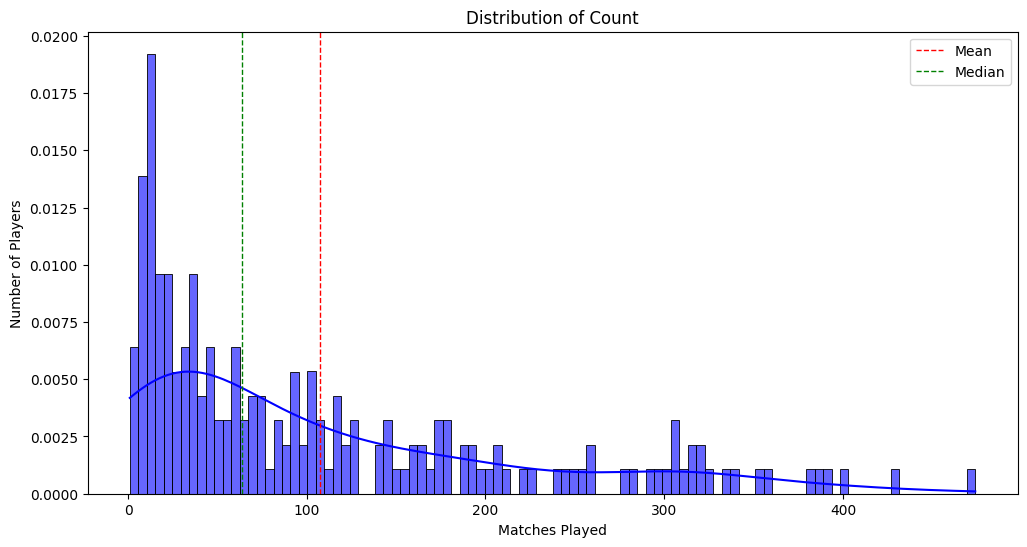

Skewness (using pandas) for Count: 1.2491


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('matches_played_playerwise.csv')  # Replace with your actual CSV file name

# Specify the column you want to plot
column_name = 'Count'  # Replace with the actual column name

# Plotting the histogram and density plot
plt.figure(figsize=(12, 6))
sns.histplot(df[column_name], bins=100, kde=True, color='blue', stat='density', alpha=0.6)
plt.title(f'Distribution of {column_name}')
plt.xlabel('Matches Played')
plt.ylabel('Number of Players')
plt.axvline(df[column_name].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df[column_name].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()

# Calculate skewness using pandas
skewness_pandas = df[column_name].skew()
print(f"Skewness (using pandas) for {column_name}: {skewness_pandas:.4f}")

In [37]:
# Count the frequency of each class
class_counts = df['Count'].value_counts()

# Calculate total number of instances
total_instances = len(df)

# Calculate percentage of each class
class_percentages = (class_counts / total_instances) * 100

# Calculate the ratio of the majority class to the minority class
majority_class_count = class_counts.max()
minority_class_count = class_counts.min()
class_ratio = majority_class_count / minority_class_count

# Calculate imbalance ratio
imbalance_ratio = class_counts.max() / class_counts.sum()

# Print the results
print("Class Counts:")
print(class_counts)

print("\nClass Percentages:")
print(class_percentages)

print(f"\nClass Ratio (Majority to Minority): {class_ratio:.2f}")

print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")

Class Counts:
Count
15     6
10     4
6      4
12     4
116    3
      ..
352    1
233    1
196    1
236    1
3      1
Name: count, Length: 140, dtype: int64

Class Percentages:
Count
15     3.030303
10     2.020202
6      2.020202
12     2.020202
116    1.515152
         ...   
352    0.505051
233    0.505051
196    0.505051
236    0.505051
3      0.505051
Name: count, Length: 140, dtype: float64

Class Ratio (Majority to Minority): 6.00

Imbalance Ratio: 0.03


In [40]:
# Assuming 'target' is your target variable
target_column = 'Count'  # Replace with your actual target column name

# Count the frequency of each class
class_counts = df[target_column].value_counts()

# Convert the counts to a DataFrame for easier description
class_counts_df = class_counts.reset_index()
class_counts_df.columns = ['Class', 'Count']  # Rename columns for clarity

# Describe the distribution of counts
distribution_description = class_counts_df['Count'].describe()

# Print the distribution description
print("Distribution of Class Counts:")
print(distribution_description)

# Print max and min values explicitly
max_count = class_counts_df['Count'].max()
min_count = class_counts_df['Count'].min()

print(f"Maximum Count: {max_count}")
print(f"Minimum Count: {min_count}")

Distribution of Class Counts:
count    140.000000
mean       1.414286
std        0.813428
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: Count, dtype: float64
Maximum Count: 6
Minimum Count: 1


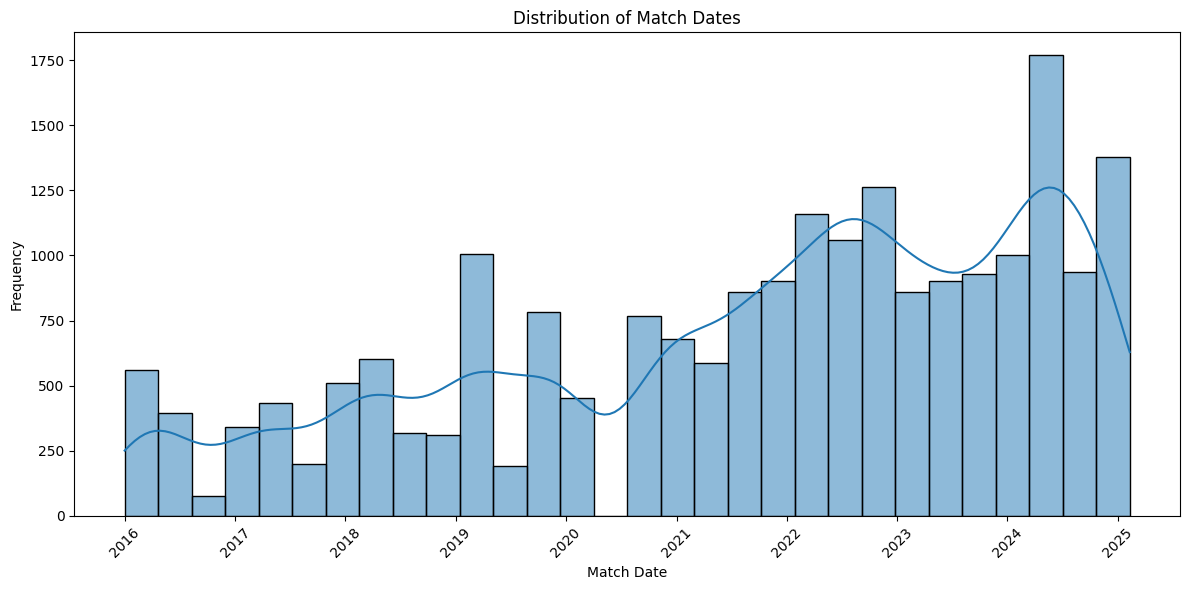

In [78]:
# Load the CSV file into a DataFrame
df = pd.read_csv('temporal_feature.csv')  # Replace with your actual CSV file name

# Convert the MatchDate column to datetime format
df['MatchDate'] = pd.to_datetime(df['MatchDate'])  # Replace with your actual MatchDate column name

# Plot the distribution of MatchDate
plt.figure(figsize=(12, 6))
sns.histplot(df['MatchDate'], bins=30, kde=True)  # KDE for a smooth curve
plt.title('Distribution of Match Dates')
plt.xlabel('Match Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [74]:
# Load the CSV file into a DataFrame
df = pd.read_csv('temporal_feature.csv')  # Replace with your actual CSV file name

# Convert the MatchDate column to datetime format
df['MatchDate'] = pd.to_datetime(df['MatchDate'])  # Replace with your actual MatchDate column name

# Define the cutoff date
cutoff_date = '2016-01-01'  # Replace with your desired cutoff date

# Filter the DataFrame to keep only rows with MatchDate on or after the cutoff date
filtered_df = df[df['MatchDate'] >= cutoff_date]

# Optionally, save the filtered DataFrame back to a new CSV file
filtered_df.to_csv('temporal_feature.csv', index=False)  # Replace with your desired output file name

# Print the number of rows before and after filtering
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after filtering: {len(filtered_df)}")

Original number of rows: 21900
Number of rows after filtering: 21224


In [27]:
df.columns

Index(['ID', 'GameFormat', 'SR', 'BattingInnings', 'IsOut', 'Opposition',
       'Ground', 'MatchDate', 'TossResult', 'MatchTime', 'isTossWon',
       'Fantasy', 'isHomeGround', 'GroundWL', 'GroundRPO', 'GroundAvg',
       'TossWL', 'TossRPO', 'TossAvg', 'inningsWL', 'inningsRPO',
       'inningsAverage', 'Average', 'Innings', 'Centuries', 'Fifties', 'Zeros',
       'Consistency', 'Form', 'Venue', 'Opps', 'MaxTemp', 'MinTemp',
       'RainProb', 'MaxWind', 'WeatherCode', 'Tournament', 'BattingOrder',
       'Batting Hand', 'Country', 'Role', 'Age'],
      dtype='object')

In [29]:
df['MatchDate'] = pd.to_datetime(df['MatchDate'])

In [30]:
df['DaysSinceLastMatch'] = df.groupby('ID')['MatchDate'].diff().dt.days.fillna(0)

df['RollingSR'] = df.groupby('ID')['SR'].shift(1).rolling(window=5, min_periods=1).mean()
df['RollingNotOut'] = df.groupby('ID')['IsOut'].shift(1).rolling(window=5, min_periods=1).mean().apply(lambda x: 1 - x)
df['RollingAverage'] = df.groupby('ID')['Average'].shift(1).rolling(window=5, min_periods=1).mean()
df['RollingForm'] = df.groupby('ID')['Form'].shift(1).rolling(window=3, min_periods=1).mean()
df['RollingConsistency'] = df.groupby('ID')['Consistency'].shift(1).rolling(window=3, min_periods=1).mean()
df['PrevMatchSR'] = df.groupby('ID')['SR'].shift(1)
df['PrevMatchIsOut'] = df.groupby('ID')['IsOut'].shift(1)
df['PrevMatchFifties'] = df.groupby('ID')['Fifties'].shift(1)
df['PrevMatchCenturies'] = df.groupby('ID')['Centuries'].shift(1)
df['CumInnings'] = df.groupby('ID')['Innings'].cumsum().shift(1).fillna(0)
df['CumZeros'] = df.groupby('ID')['Zeros'].cumsum().shift(1).fillna(0)
df['CumSR'] = df.groupby('ID')['SR'].cumsum().shift(1) / (df.groupby('ID')['Innings'].cumsum().shift(1) + 1).fillna(0)
df['GroundRollingAvg'] = df.groupby(['ID', 'Ground'])['SR'].shift(1).rolling(window=3, min_periods=1).mean()
df['OppRollingSR'] = df.groupby(['ID', 'Opposition'])['SR'].shift(1).rolling(window=3, min_periods=1).mean()
df['TimeWeightedForm'] = df.groupby('ID')['Form'].shift(1).ewm(span=5, adjust=False).mean()

In [31]:
# Save the DataFrame to a CSV file
df.to_csv('final.csv', index=False)  # Replace 'id_counts.csv' with your desired output file name

print("DataFrame has been saved to 'id_counts.csv'.")

DataFrame has been saved to 'id_counts.csv'.
